<a href="https://colab.research.google.com/github/kaiway0/kaiway0/blob/main/Team_3_NYCAirbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYC Airbnb Analysis**

Team 3:

Angela Lee

Endi

Bijisha

Yiming

Khine

Isuru

## **Introduction and Room Type Analysis- Angela Lee**


In [ ]:
from google.colab import files

# Upload the CSV file from your local machine
uploaded = files.upload()

Saving listingNYC.csv to listingNYC.csv


In [ ]:
from google.colab import files

# Upload the CSV file from your local machine
uploaded = files.upload()

Saving listingsNYC2023.csv to listingsNYC2023.csv


In [ ]:
#Importing relevant packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import geopandas as gpd
import param
import numpy as np
import panel as pn
import plotly.graph_objs as go
from google.colab import files
import folium
from folium.plugins import HeatMap

In [ ]:
# Read the CSV file into a DataFrame
room = pd.read_csv('listingNYC.csv')
# Read the CSV file into a DataFrame
room2 = pd.read_csv('listingsNYC2023.csv')

print(room.columns)
print(room2.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<ipython-input-4-bf131324f89d>:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  room2 = pd.read_csv('listingsNYC2023.csv')


In [ ]:
# Define relevant columns to keep
relevant_columns = ['neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type']

# Keep only relevant columns
room = room[relevant_columns]

relevant_columns2 = ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type']

# Keep only relevant columns
room2 = room2[relevant_columns2]

print(room)
print (room2)

      neighbourhood_group_cleansed neighbourhood_cleansed   latitude  \
0                        Manhattan           East Village  40.731790   
1                         Brooklyn               Flatbush  40.653750   
2                        Manhattan         Hell's Kitchen  40.753780   
3                        Manhattan                 Harlem  40.824400   
4                         Brooklyn               Bushwick  40.690200   
...                            ...                    ...        ...   
39714                    Manhattan      Greenwich Village  40.730580   
39715                    Manhattan                Chelsea  40.746682   
39716                    Manhattan              Chinatown  40.713750   
39717                    Manhattan           West Village  40.733170   
39718                       Queens               Rosedale  40.658874   

       longitude        room_type  
0     -73.986790  Entire home/apt  
1     -73.955020  Entire home/apt  
2     -73.996330  Entire ho

In [ ]:
# Remove rows with missing data
room = room.dropna()
print(room)

#Remove rows with missing data from 2023 data
room2 = room2.dropna()
print(room2)


      neighbourhood_group_cleansed neighbourhood_cleansed   latitude  \
0                        Manhattan           East Village  40.731790   
1                         Brooklyn               Flatbush  40.653750   
2                        Manhattan         Hell's Kitchen  40.753780   
3                        Manhattan                 Harlem  40.824400   
4                         Brooklyn               Bushwick  40.690200   
...                            ...                    ...        ...   
39714                    Manhattan      Greenwich Village  40.730580   
39715                    Manhattan                Chelsea  40.746682   
39716                    Manhattan              Chinatown  40.713750   
39717                    Manhattan           West Village  40.733170   
39718                       Queens               Rosedale  40.658874   

       longitude        room_type  
0     -73.986790  Entire home/apt  
1     -73.955020  Entire home/apt  
2     -73.996330  Entire ho

##Distribution of Room Types By Borough {Angela}

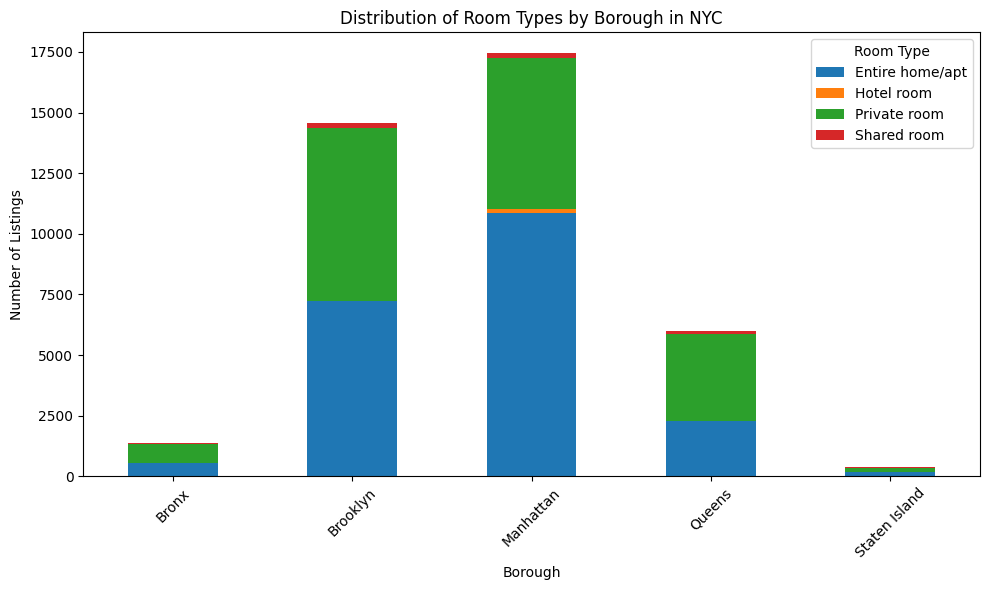

In [ ]:
# Group data by borough and room type, and count occurrences
room_type_distribution = room.groupby(['neighbourhood_group_cleansed', 'room_type']).size().unstack()

# Plotting the bar chart
room_type_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Room Types by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


##Distribution comparison between 2023 and 2024 data {Angela}

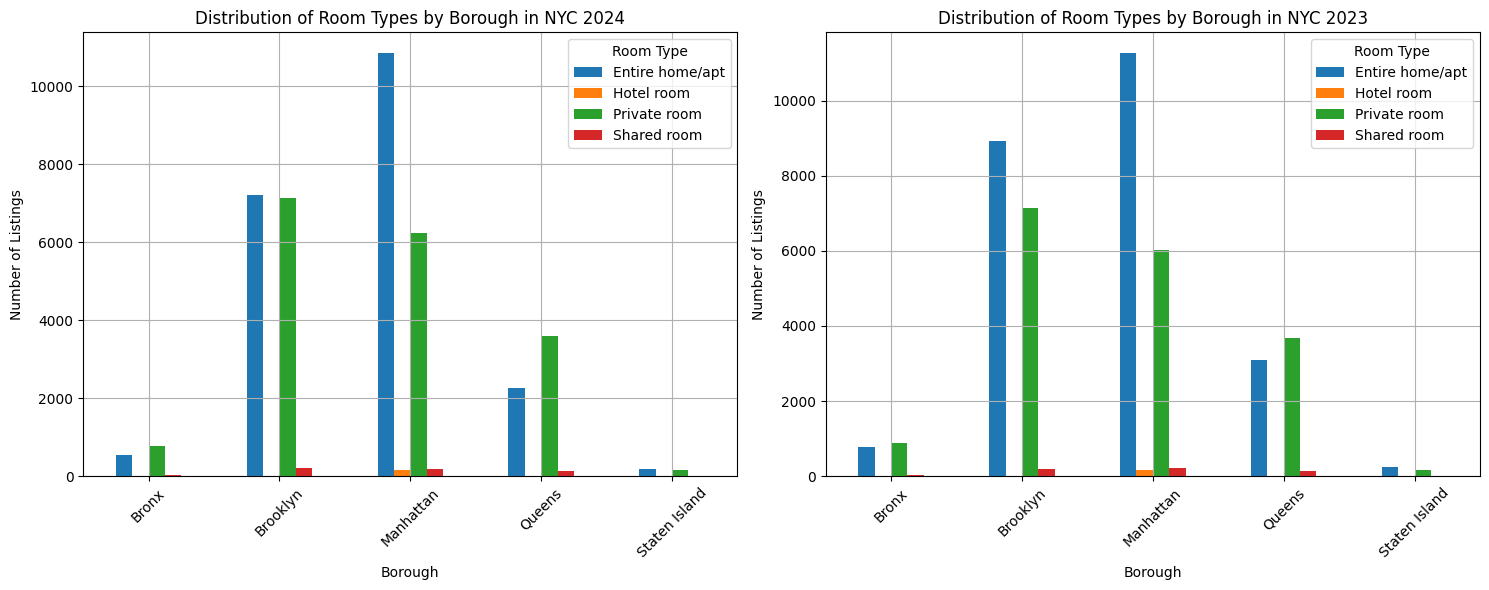

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the bar chart for 2024 data
room_type_distribution.plot(kind='bar', ax=axs[0])
axs[0].set_title('Distribution of Room Types by Borough in NYC 2024')
axs[0].set_xlabel('Borough')
axs[0].set_ylabel('Number of Listings')
axs[0].set_xticklabels(room_type_distribution.index, rotation=45)
axs[0].legend(title='Room Type')
axs[0].grid(True)

# Plotting the bar chart for 2023 data
room_type_distribution2.plot(kind='bar', ax=axs[1])
axs[1].set_title('Distribution of Room Types by Borough in NYC 2023')
axs[1].set_xlabel('Borough')
axs[1].set_ylabel('Number of Listings')
axs[1].set_xticklabels(room_type_distribution2.index, rotation=45)
axs[1].legend(title='Room Type')
axs[1].grid(True)

plt.tight_layout()
plt.show()


##Heat Map of Room Type Distribution in 2023 & 2024 {Angela}


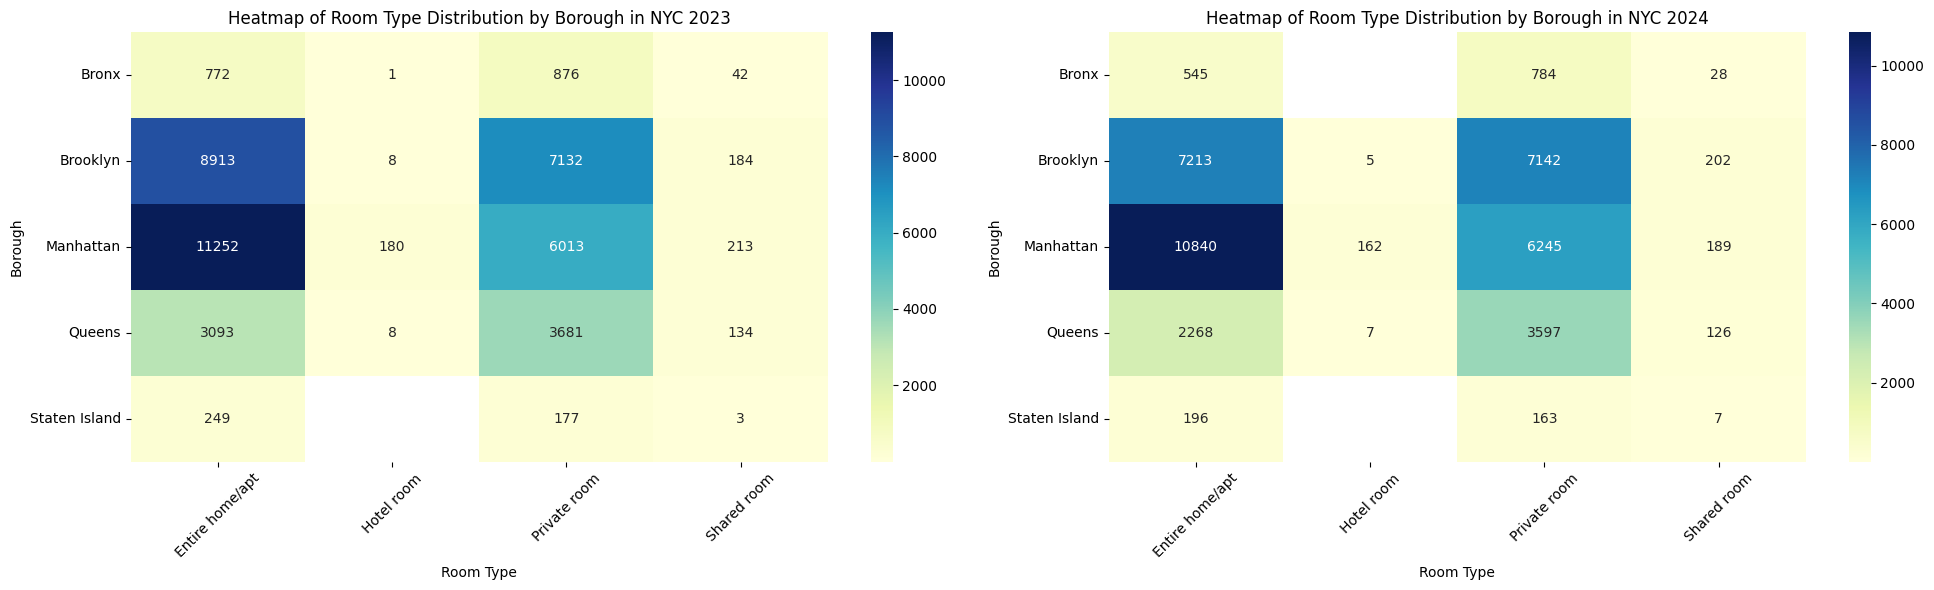

In [ ]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first heatmap
sns.heatmap(room_type_distribution2, cmap='YlGnBu', annot=True, fmt='.0f', ax=axes[0])
axes[0].set_title('Heatmap of Room Type Distribution by Borough in NYC 2023')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Borough')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the second heatmap
sns.heatmap(room_type_distribution, cmap='YlGnBu', annot=True, fmt='.0f', ax=axes[1])
axes[1].set_title('Heatmap of Room Type Distribution by Borough in NYC 2024')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Borough')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

##Difference in Room Counts {Angela}

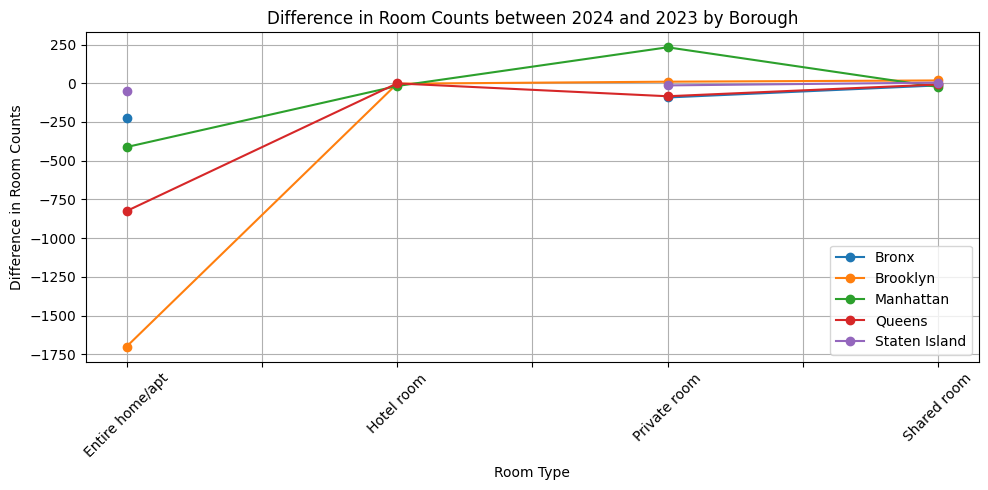

In [ ]:
#Listing differences for the year
# Calculate the difference in room counts between 2024 and 2023 data for each borough
borough_differences = {}
for borough in room_type_distribution.index:
    difference = room_type_distribution.loc[borough] - room_type_distribution2.loc[borough]
    borough_differences[borough] = difference

# Plotting the difference for each borough
fig, ax = plt.subplots(figsize=(10, 5))

for borough, difference in borough_differences.items():
    difference.plot(kind='line', marker='o', label=borough)

ax.set_title('Difference in Room Counts between 2024 and 2023 by Borough')
ax.set_xlabel('Room Type')
ax.set_ylabel('Difference in Room Counts')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


#Price- Endi Spasse

In [ ]:
# Upload the CSV file from your local machine
uploaded = files.upload()
# Read the CSV file into a DataFrame
df6 = pd.read_csv('listings.csv')

Saving listings.csv to listings (1).csv


##Most Expensive Listing in Each Borough {Endi}

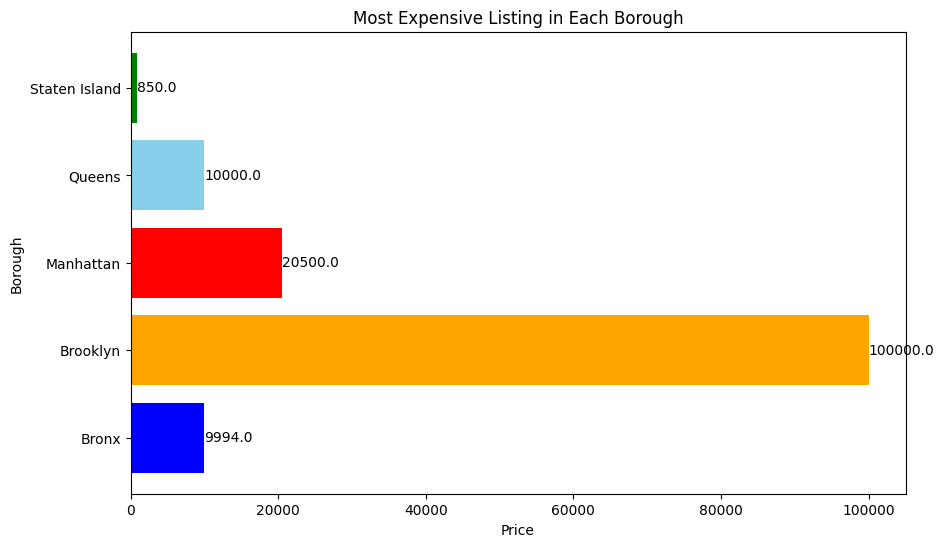

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('Price')
ax.set_ylabel('Borough')
ax.set_title('Most Expensive Listing in Each Borough')

top = df6.groupby('neighbourhood_group').apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)

colors = {'Manhattan': 'red', 'Brooklyn': 'orange', 'Bronx': 'blue', 'Staten Island': 'green', 'Queens': 'skyblue'}

bars = ax.barh(top['neighbourhood_group'], top['price'], color=top['neighbourhood_group'].map(colors))

top.apply(lambda x: ax.text(x['price'], x.name, f'{x["price"]}', va='center'), axis=1)

plt.show()



##Price vs. Number of Reviews {Endi}

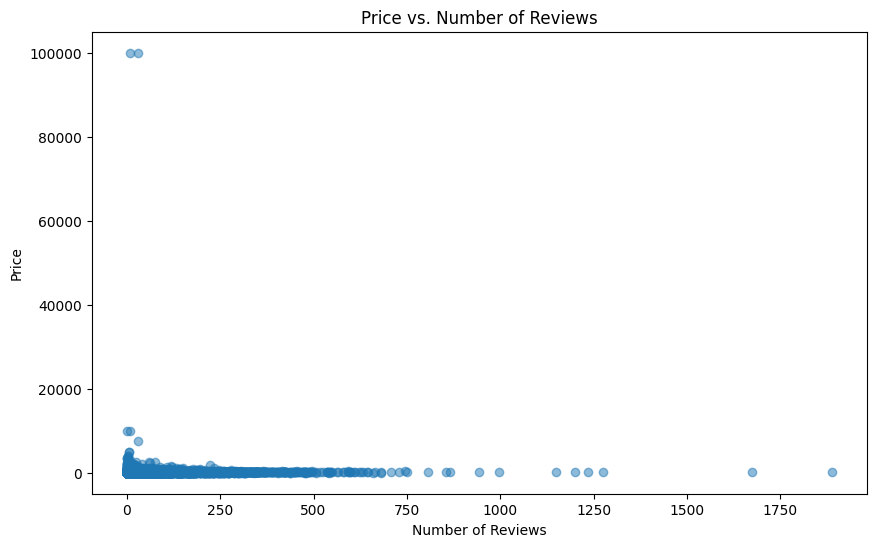

In [ ]:
plt.figure(figsize=(10, 6))

plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')

df6f = df6[df6['number_of_reviews'] > 0]
plt.scatter(df6f['number_of_reviews'], df6f['price'], alpha=0.5)

plt.show()

#Host- Yiming Zhang

In [ ]:
host = pd.read_csv('listingNYC.csv')
host

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.193561e+07,https://www.airbnb.com/rooms/21935608,2.020000e+13,1/5/24,previous scrape,Rental unit in New York · ★4.67 · 1 bedroom · ...,NaN,NaN,https://a0.muscache.com/pictures/55c47994-3f02...,5448955,...,4.80,5.00,4.40,NaN,f,1,1,0,0,0.20
1,7.430000e+17,https://www.airbnb.com/rooms/743430766348459803,2.020000e+13,1/5/24,previous scrape,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,83422715,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2,4.539906e+06,https://www.airbnb.com/rooms/4539906,2.020000e+13,1/6/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/d20c2690-17a3...,23540800,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,2.212272e+07,https://www.airbnb.com/rooms/22122723,2.020000e+13,1/5/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/6a943c46-cb6c...,43719554,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,2.243486e+07,https://www.airbnb.com/rooms/22434861,2.020000e+13,1/5/24,previous scrape,Rental unit in Brooklyn · 3 bedrooms · 4 beds ...,NaN,NaN,https://a0.muscache.com/pictures/3b4347a6-3300...,5925222,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39714,2.835711e+06,https://www.airbnb.com/rooms/2835711,2.020000e+13,1/6/24,city scrape,Rental unit in New York · ★4.46 · 1 bedroom · ...,NaN,West Village!,https://a0.muscache.com/pictures/71169c1c-0055...,3237504,...,4.88,4.93,4.48,NaN,f,1,1,0,0,0.48
39715,9.880000e+17,https://www.airbnb.com/rooms/988442103511696676,2.020000e+13,1/6/24,city scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,326434148,...,NaN,NaN,NaN,NaN,f,6,0,4,2,NaN
39716,7.830000e+17,https://www.airbnb.com/rooms/782661008019550832,2.020000e+13,1/6/24,city scrape,Rental unit in New York · ★5.0 · 1 bedroom · 1...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,163083101,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.91
39717,1.007146e+07,https://www.airbnb.com/rooms/10071464,2.020000e+13,1/8/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/2ed4f001-c523...,51678353,...,5.00,4.50,5.00,NaN,f,1,0,1,0,0.02


In [ ]:
host['host_response_rate'] = pd.to_numeric(host['host_response_rate'].str.replace('%', ''), errors='coerce')

In [ ]:
average_response_rate_by_superhost = host.groupby('host_is_superhost')['host_response_rate'].mean()

##Superhost vs Response Rate {Yiming}

([<matplotlib.axis.XTick at 0x7b5229832620>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

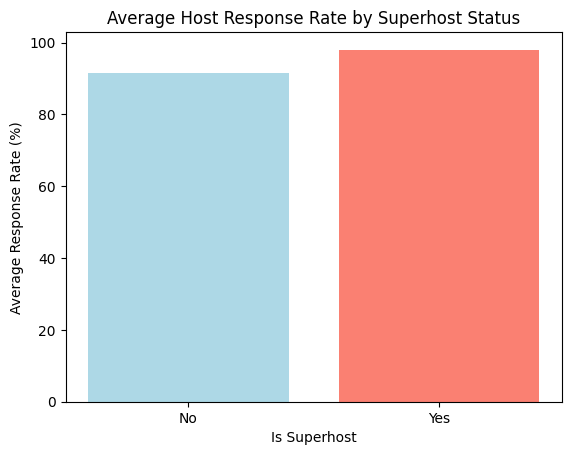

In [ ]:
fig, ax = plt.subplots()
bars = ax.bar(average_response_rate_by_superhost.index, average_response_rate_by_superhost.values, color=['lightblue', 'salmon'])

plt.title('Average Host Response Rate by Superhost Status')
plt.xlabel('Is Superhost')
plt.ylabel('Average Response Rate (%)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## Host Rate vs Room Availability {Yiming}

In [ ]:
bins = [-1, 4.3, 4.5, 4.7, 5]
labels = ['< 4.3', '4.3 <= rating < 4.5', '4.5 <= rating < 4.7', '4.7 <= rating < 5', 'rating = 5']
availability_periods = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

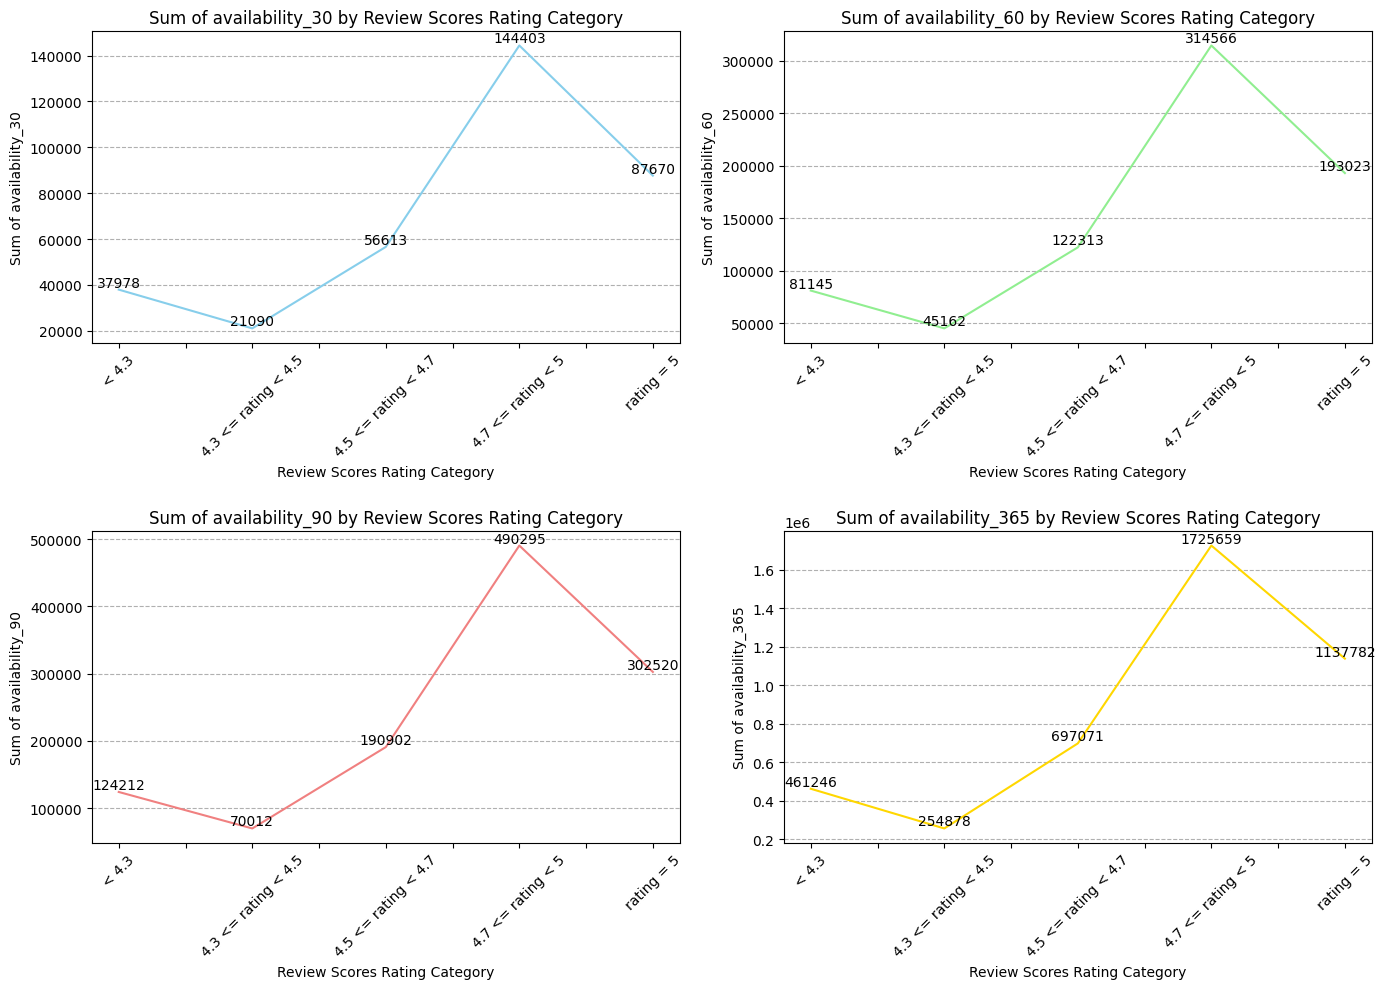

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, period in enumerate(availability_periods):
    # Filter necessary columns and drop rows with missing values
    filtered_data_sum = host[['review_scores_rating', period]].dropna()

    # Create a new column for rating categories based on the current availability period
    filtered_data_sum['rating_category'] = pd.cut(filtered_data_sum['review_scores_rating'], bins=bins, labels=labels[:-1], right=False)

    # Aggregate sums of availability within each rating category
    category_sums = filtered_data_sum.groupby('rating_category')[period].sum()

    # Include the sum for 'rating = 5'
    rating_5_sum = filtered_data_sum[filtered_data_sum['review_scores_rating'] == 5][period].sum()
    category_sums['rating = 5'] = rating_5_sum

    # Plot for the current availability period
    category_sums.plot(kind='line', color=colors[i], ax=axes[i])
    axes[i].set_title(f'Sum of {period} by Review Scores Rating Category')
    axes[i].set_xlabel('Review Scores Rating Category')
    axes[i].set_ylabel(f'Sum of {period}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--')

    for index, value in enumerate(category_sums):
        axes[i].text(index, value + 3, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Reviews- Bijisha Shrestha

In [ ]:
# Read the CSV file into a DataFrame
df4 = pd.read_csv('listingNYC.csv')
print(df4.head())

             id                                      listing_url  \
0  2.193561e+07            https://www.airbnb.com/rooms/21935608   
1  7.430000e+17  https://www.airbnb.com/rooms/743430766348459803   
2  4.539906e+06             https://www.airbnb.com/rooms/4539906   
3  2.212272e+07            https://www.airbnb.com/rooms/22122723   
4  2.243486e+07            https://www.airbnb.com/rooms/22434861   

      scrape_id last_scraped           source  \
0  2.020000e+13       1/5/24  previous scrape   
1  2.020000e+13       1/5/24  previous scrape   
2  2.020000e+13       1/6/24  previous scrape   
3  2.020000e+13       1/5/24  previous scrape   
4  2.020000e+13       1/5/24  previous scrape   

                                                name  description  \
0  Rental unit in New York · ★4.67 · 1 bedroom · ...          NaN   
1  Rental unit in Brooklyn · 1 bedroom · 1 bed · ...          NaN   
2  Rental unit in New York · 1 bedroom · 1 bed · ...          NaN   
3  Rental unit in Ne

##Total Review by Year 2011-2014 {Bijisha}

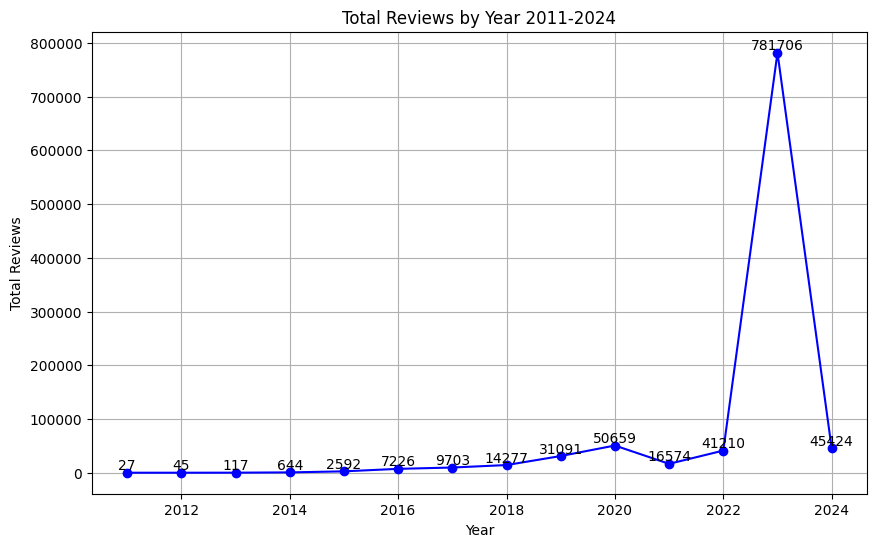

In [ ]:

# Convert 'last_review' column to datetime
df4['last_review'] = pd.to_datetime(df4['last_review'])

# Extract year from 'last_review'
df4['year'] = df4['last_review'].dt.year

# Group by year and calculate total reviews
total_reviews_by_year = df4.groupby('year')['number_of_reviews'].sum()

plt.figure(figsize=(10, 6))
plt.plot(total_reviews_by_year.index, total_reviews_by_year.values, color='Blue', marker='o', linestyle='-')
plt.title('Total Reviews by Year 2011-2024')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.grid(True)

#Adding number of reviews as annotations
for year, reviews in zip(total_reviews_by_year.index, total_reviews_by_year.values):
    plt.text(year, reviews, f'{reviews}', ha='center', va='bottom')
plt.show()

##Top 10 Host by Number of Review {Bijisha}

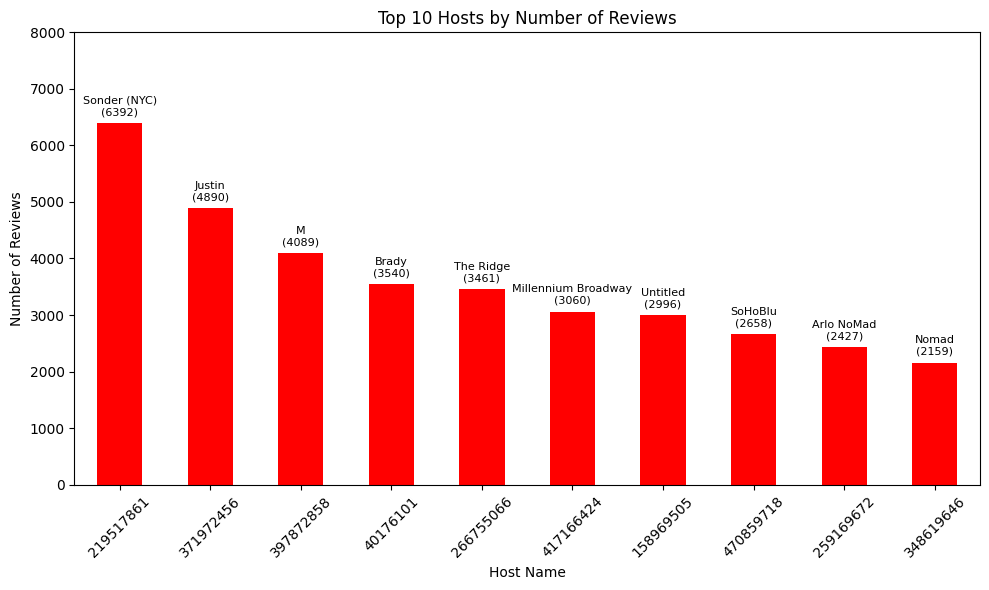

In [ ]:
host_map = df4.set_index('host_id')['host_name'].to_dict()

# Grouping the DataFrame by host_id and calculating the total number of reviews for each host
host_reviews = df4.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending=False)

# Selecting the top 10 hosts by number of reviews
top_10_hosts = host_reviews.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = top_10_hosts.plot(kind='bar', color='red')  # Change color to red
plt.title('Top 10 Hosts by Number of Reviews')
plt.xlabel('Host Name')  # Change x-axis label to Host Name
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.ylim(0, 8000)  # Set the y-axis limit to 8000
plt.tight_layout()

# Adding labels for each bar with smaller font size
for i, (host_id, reviews) in enumerate(top_10_hosts.items()):
    host_name = host_map.get(host_id, 'Unknown')
    plt.text(i, reviews + 100, f'{host_name}\n({reviews})', ha='center', va='bottom', fontsize=8)

plt.show()


##Average review per month by Room Type and Neighboorhood Group {Bijisha}

<ipython-input-25-beb3e7410329>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room_type', y='reviews_per_month', hue='neighbourhood_group_cleansed', data=df4, palette='Reds', ci=None, linewidth=0)


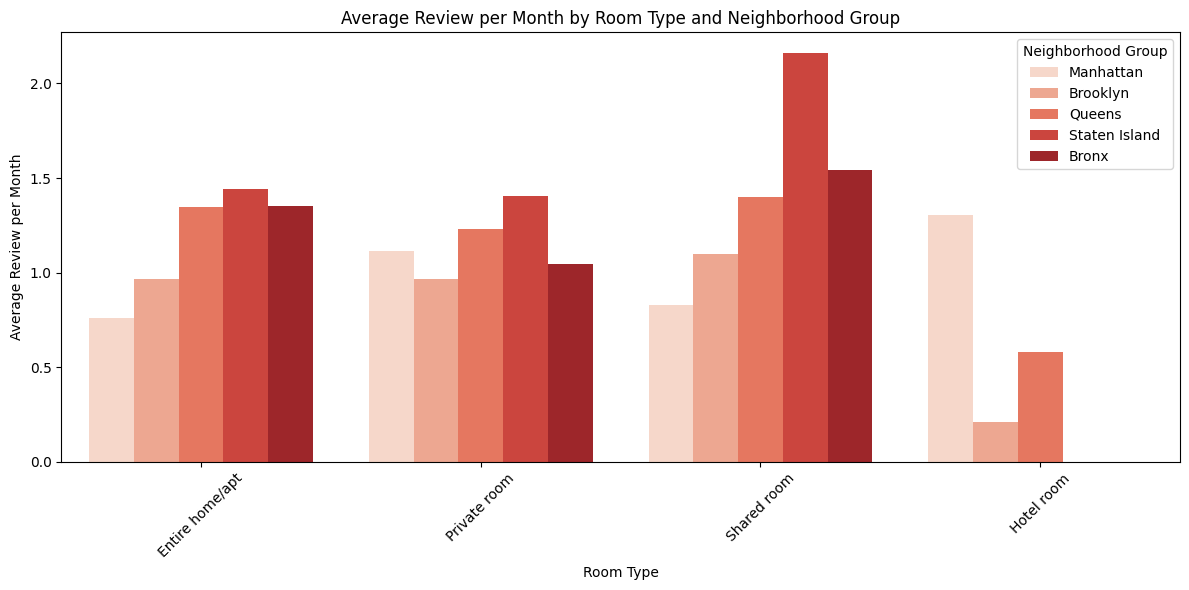

In [ ]:

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='reviews_per_month', hue='neighbourhood_group_cleansed', data=df4, palette='Reds', ci=None, linewidth=0)
plt.title('Average Review per Month by Room Type and Neighborhood Group')
plt.xlabel('Room Type')
plt.ylabel('Average Review per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Neighborhood Group')
plt.show()

#Seasonal Analysis- Khine

In [69]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import altair as alt

##Cleaning {Khine}

In [70]:
khine = pd.read_csv('listingNYC.csv')
khine

,id,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,977395984065981849,95344065,Derek,9/15/16,"New York, NY",0%,54%,f,Sheepshead Bay,8.0,...,4.00,4.00,3.00,NaN,f,7,1,6,0,0.86
1,648033676238017128,421601513,J Carlos Retals,9/4/21,United States,100%,97%,t,West Bronx,6.0,...,4.83,4.94,4.94,NaN,f,3,0,3,0,0.95
2,871990853610302281,484563208,Tricia,10/21/22,"New York, NY",100%,100%,t,Jamaica,2.0,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
3,15943497,88043058,Pamela,8/4/16,"New York, United States",50%,86%,t,Bedford-Stuyvesant,3.0,...,4.94,4.86,4.75,NaN,f,3,0,3,0,2.14
4,845596919658541172,3223938,Eugene,8/11/12,"New York, NY",99%,18%,t,Flatbush,611.0,...,NaN,NaN,NaN,NaN,f,600,1,599,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39197,1061633200531291580,544554359,John Hotel,11/2/23,NaN,100%,100%,f,Flushing,5.0,...,NaN,NaN,NaN,Exempt,t,5,0,5,0,NaN
39198,932893071035345056,171636572,Keegan,2/4/18,"New York, NY",100%,NaN,f,Bushwick,1.0,...,NaN,NaN,NaN,OSE-STRREG-0000365,f,1,0,1,0,NaN
39199,765951216153524797,202829797,Crystal,7/16/18,"Raeford, NC",100%,0%,f,NaN,4.0,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
39200,4352537,22595345,Abel,10/16/14,"New York, NY",100%,50%,f,Gramercy Park,1.0,...,4.76,4.83,4.62,NaN,f,1,1,0,0,0.51


In [ ]:
listings = khine.dropna()

In [ ]:
#Define relevant columns to keep
needed_columns = ['price','number_of_reviews','first_review','review_scores_rating','reviews_per_month']

# Keep only relevant columns
listings = khine[needed_columns]

nan_counts = listings.isnull().sum()
print(nan_counts)


price                   10628
number_of_reviews           0
first_review            11543
review_scores_rating    11533
reviews_per_month       11543
dtype: int64


In [ ]:
# Assuming 'price' is a column in df_filtered and may contain non-numeric characters like '$'
# Remove currency symbols and other non-numeric characters, then convert to float
listings['price'] = pd.to_numeric(listings['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Now, 'price' is a numeric column, and you can proceed with calculating the average per month

listings['first_review'] = pd.to_datetime(listings['first_review'])

# Extract month from 'first_review' as an integer
listings['review_month'] = listings['first_review'].dt.month

# Calculate average price for each month
monthly_price = listings.groupby('review_month')['price'].mean().reset_index()

##Distribution of Review Scores by Month {Khine}

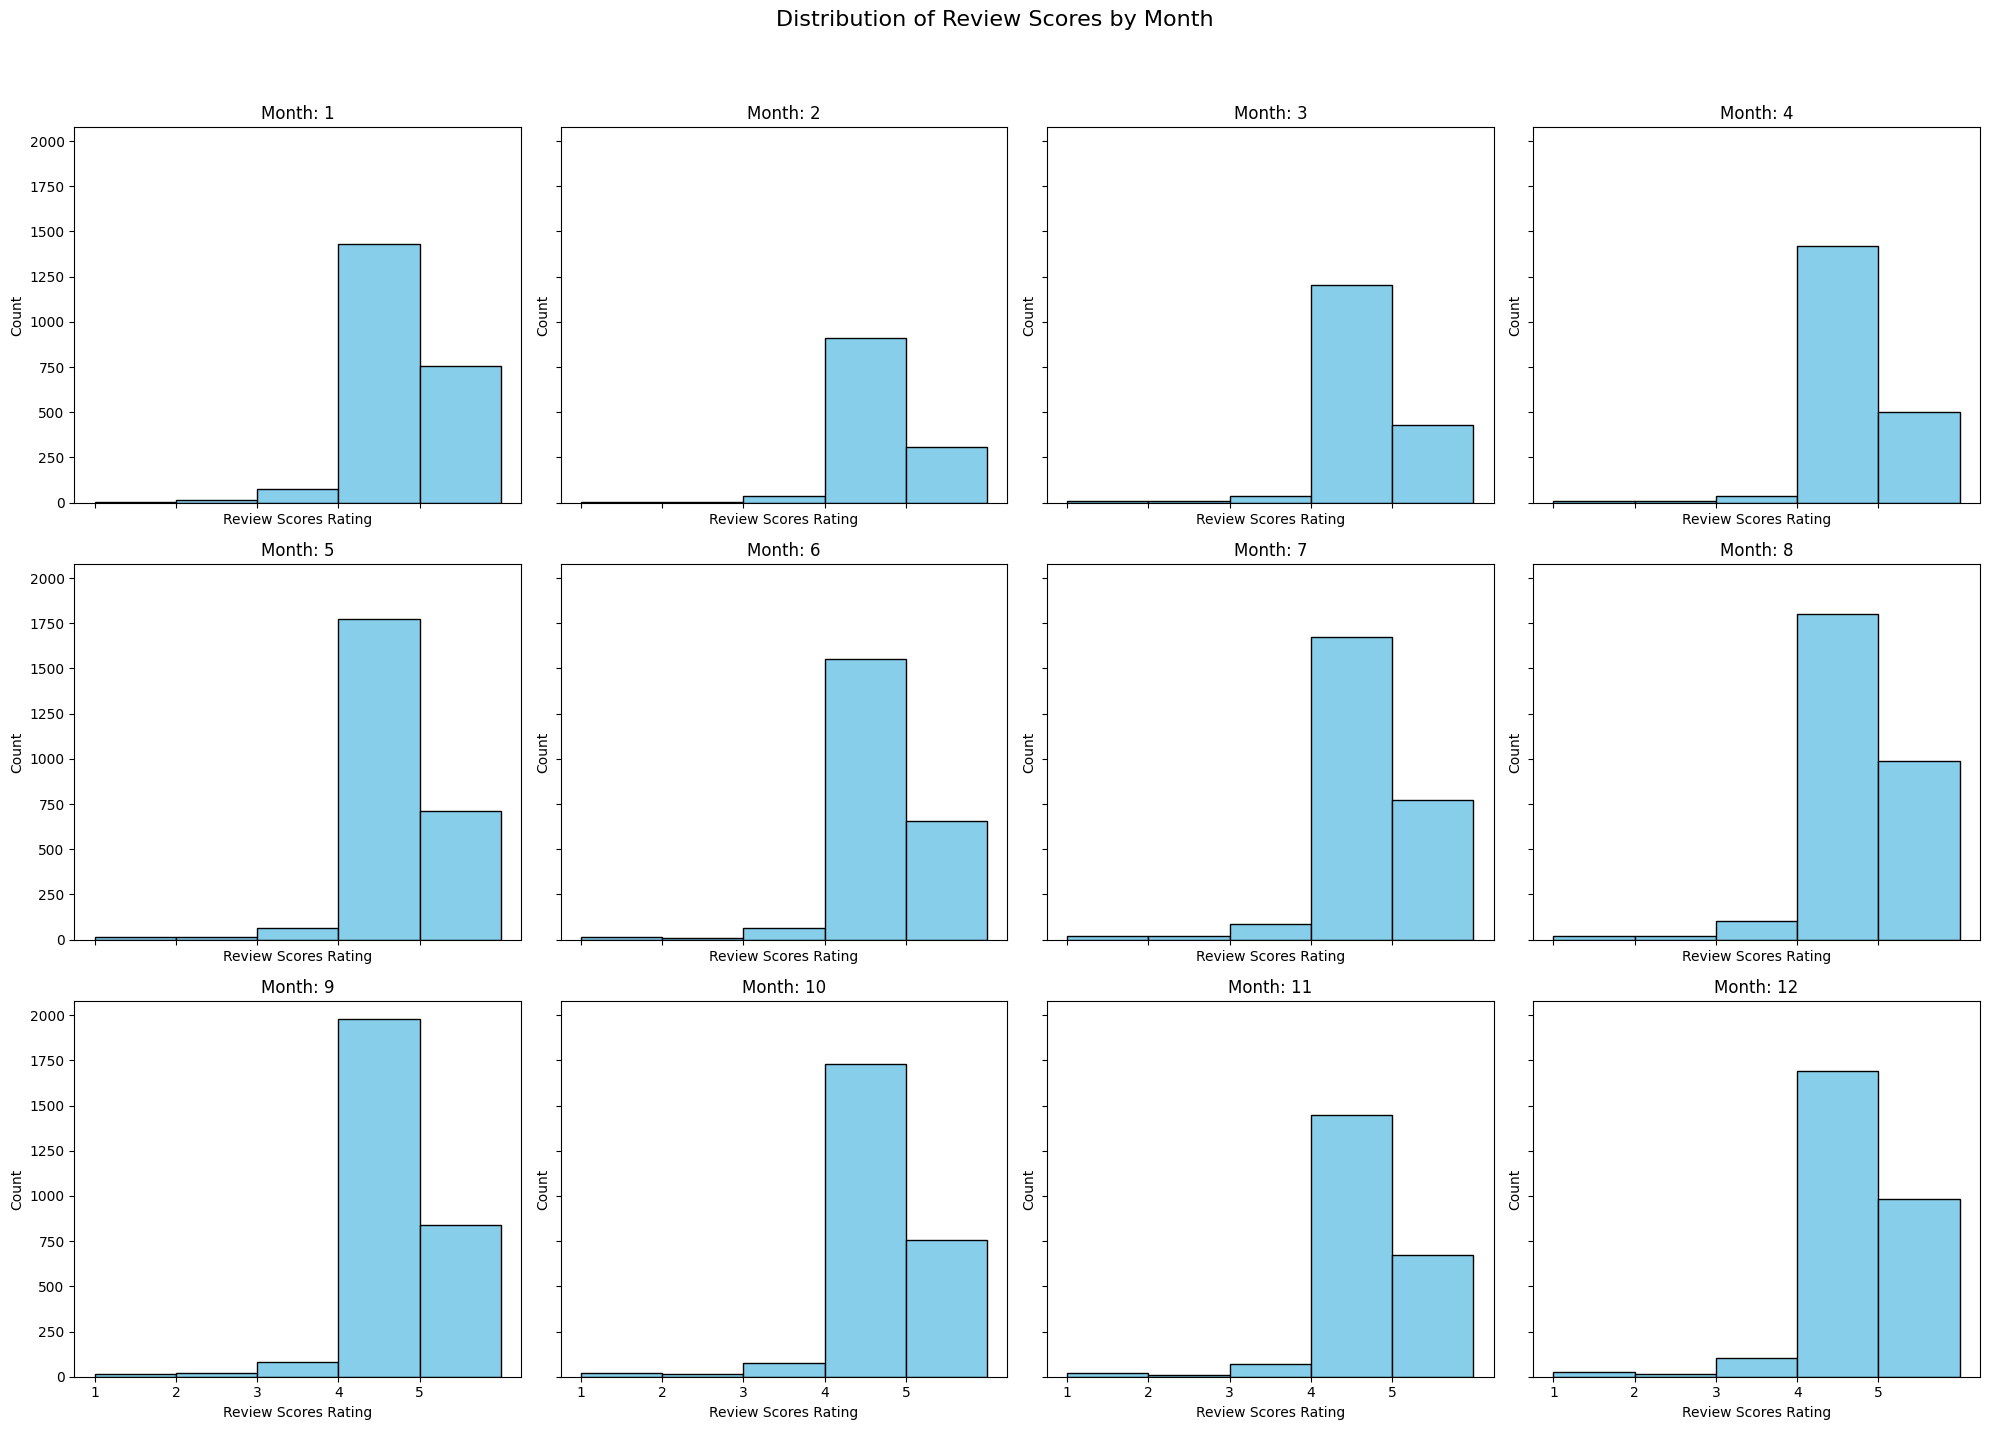

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'review_month' is a categorical variable with the correct order
listings['review_month'] = pd.Categorical(listings['review_month'], categories=range(1, 13), ordered=True)

# Create a grid of histograms for the distribution of review scores by month
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)

for i, ax in enumerate(axs.flatten(), start=1):
    month_data = listings[listings['review_month'] == i]['review_scores_rating']
    ax.hist(month_data, bins=range(1, 7), color='skyblue', edgecolor='black')
    ax.set_title(f'Month: {i}')
    ax.set_xlabel('Review Scores Rating')
    ax.set_ylabel('Count')
    ax.set_xticks(range(1, 6))

# Add a main title and adjust the layout
plt.suptitle('Distribution of Review Scores by Month', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust if title overlaps with subplots

plt.show()

##Count of Reviews per Month {Khine}

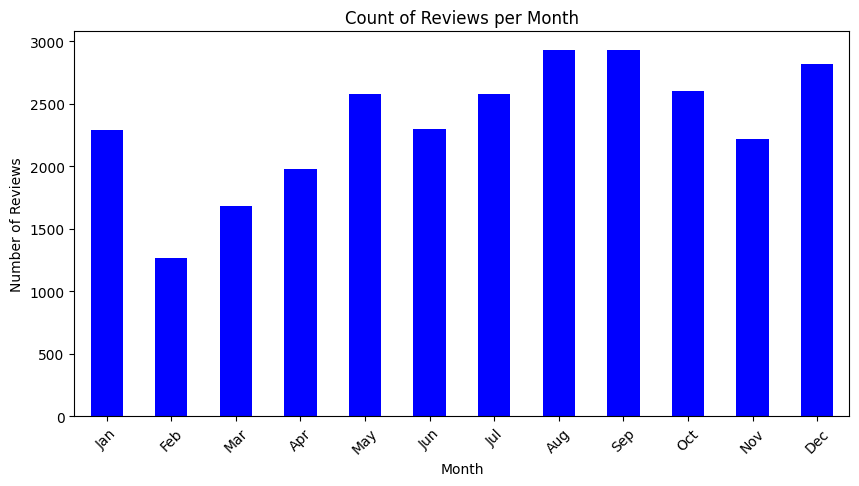

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Ensure 'review_month' is a categorical variable with the correct order
listings['review_month'] = pd.Categorical(listings['review_month'], categories=range(1, 13), ordered=True)

# Count the number of reviews per month
reviews_per_month = listings['review_month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
reviews_per_month.plot(kind='bar', color='blue')
plt.title('Count of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

# Replace numerical month with string labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=45)  # Set custom month labels

plt.show()

##Average Price vs. Review Scores Rating {Khine}

In [ ]:
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')

avg_price_by_score = listings.groupby(['review_month', 'review_scores_rating'])['price'].mean().reset_index()

def plot_data_by_month(month):
    filtered_data = avg_price_by_score[avg_price_by_score['review_month'] == month]

    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_data['review_scores_rating'], filtered_data['price'], color='blue', alpha=0.5)
    plt.title(f'Average Price vs. Review Scores Rating (Month: {month})')
    plt.xlabel('Review Scores Rating')
    plt.ylabel('Average Price')
    plt.grid(True)
    plt.show()
from ipywidgets import interact, IntSlider

month_slider = IntSlider(
    value=1,
    min=1,
    max=12,
    step=1,
    description='Month:',
    continuous_update=False)

interact(plot_data_by_month, month=month_slider)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Month:', max=12, min=1), Output…

<function __main__.plot_data_by_month(month)>

#Availability and Conclusion - Isuru Perera

In [ ]:
from google.colab import files

# Upload the CSV file from your local machine
uploaded = files.upload()

Saving listingNYC_isuru.csv to listingNYC_isuru.csv


In [ ]:
# Read the CSV file into a DataFrame
newdf = pd.read_csv('listingNYC_isuru.csv')

print(newdf.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
# Define relevant columns to keep
avail_analysis3 = ['neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type','availability_30','availability_60','availability_90','availability_365','property_type','room_type','price','review_scores_rating']

# Keep only relevant columns
df_avail = newdf[avail_analysis3]

In [ ]:
newdf

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.193561e+07,https://www.airbnb.com/rooms/21935608,2.020000e+13,1/5/24,previous scrape,Rental unit in New York · ★4.67 · 1 bedroom · ...,NaN,NaN,https://a0.muscache.com/pictures/55c47994-3f02...,5448955,...,4.80,5.00,4.40,NaN,f,1,1,0,0,0.20
1,7.430000e+17,https://www.airbnb.com/rooms/743430766348459803,2.020000e+13,1/5/24,previous scrape,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,83422715,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2,4.539906e+06,https://www.airbnb.com/rooms/4539906,2.020000e+13,1/6/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/d20c2690-17a3...,23540800,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,2.212272e+07,https://www.airbnb.com/rooms/22122723,2.020000e+13,1/5/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/6a943c46-cb6c...,43719554,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,2.243486e+07,https://www.airbnb.com/rooms/22434861,2.020000e+13,1/5/24,previous scrape,Rental unit in Brooklyn · 3 bedrooms · 4 beds ...,NaN,NaN,https://a0.muscache.com/pictures/3b4347a6-3300...,5925222,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39714,2.835711e+06,https://www.airbnb.com/rooms/2835711,2.020000e+13,1/6/24,city scrape,Rental unit in New York · ★4.46 · 1 bedroom · ...,NaN,West Village!,https://a0.muscache.com/pictures/71169c1c-0055...,3237504,...,4.88,4.93,4.48,NaN,f,1,1,0,0,0.48
39715,9.880000e+17,https://www.airbnb.com/rooms/988442103511696676,2.020000e+13,1/6/24,city scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,326434148,...,NaN,NaN,NaN,NaN,f,6,0,4,2,NaN
39716,7.830000e+17,https://www.airbnb.com/rooms/782661008019550832,2.020000e+13,1/6/24,city scrape,Rental unit in New York · ★5.0 · 1 bedroom · 1...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,163083101,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.91
39717,1.007146e+07,https://www.airbnb.com/rooms/10071464,2.020000e+13,1/8/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/2ed4f001-c523...,51678353,...,5.00,4.50,5.00,NaN,f,1,0,1,0,0.02


In [ ]:
#Drop null values
df_avail.dropna
df_avail

,neighbourhood_group_cleansed,neighbourhood_cleansed,latitude,longitude,room_type,availability_30,availability_60,availability_90,availability_365,property_type,room_type,price,review_scores_rating
0,Manhattan,East Village,40.731790,-73.986790,Entire home/apt,0,0,0,0,Entire rental unit,Entire home/apt,NaN,4.67
1,Brooklyn,Flatbush,40.653750,-73.955020,Entire home/apt,30,60,90,365,Entire rental unit,Entire home/apt,$289.00,NaN
2,Manhattan,Hell's Kitchen,40.753780,-73.996330,Entire home/apt,0,0,0,0,Entire rental unit,Entire home/apt,NaN,NaN
3,Manhattan,Harlem,40.824400,-73.945980,Private room,0,0,0,0,Private room in rental unit,Private room,NaN,NaN
4,Brooklyn,Bushwick,40.690200,-73.917820,Entire home/apt,0,0,0,0,Entire rental unit,Entire home/apt,NaN,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39714,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,0,0,0,0,Entire rental unit,Entire home/apt,$105.00,4.46
39715,Manhattan,Chelsea,40.746682,-73.990396,Private room,29,59,89,269,Private room in rental unit,Private room,$140.00,NaN
39716,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,28,58,88,363,Entire rental unit,Entire home/apt,$115.00,5.00
39717,Manhattan,West Village,40.733170,-74.006080,Private room,0,0,0,0,Private room in rental unit,Private room,NaN,4.50


##Average Availability by Neighbourhood Group for Different Periods {Isuru}

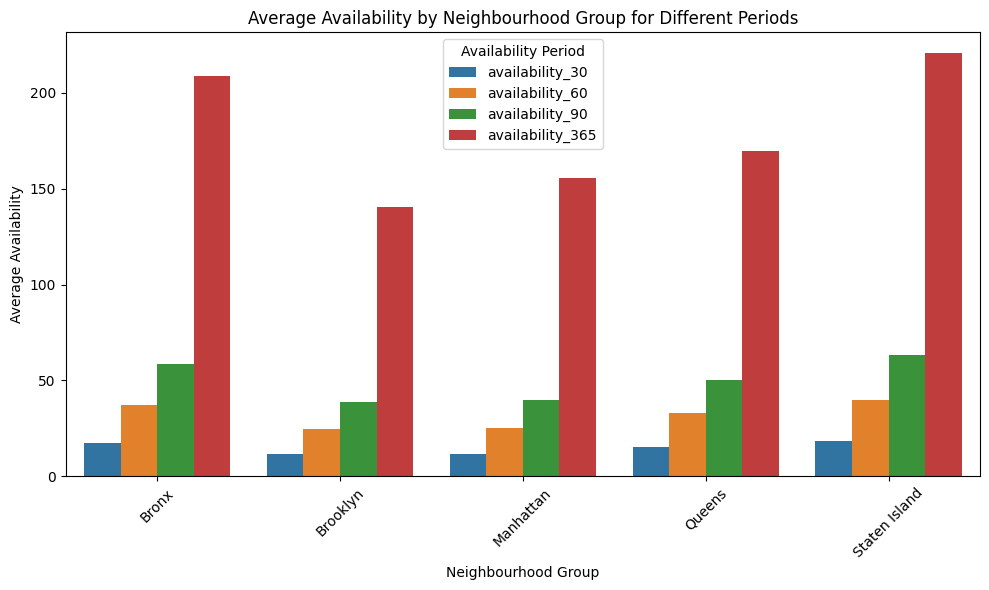

In [ ]:
# Group the data by 'neighbourhood_group_cleansed' and calculate the mean availability
grouped_data = df_avail.groupby('neighbourhood_group_cleansed').agg({
    'availability_30': 'mean',
    'availability_60': 'mean',
    'availability_90': 'mean',
    'availability_365': 'mean'
}).reset_index()

# Plotting the bar graphs
plt.figure(figsize=(10, 6))


melted_data = grouped_data.melt(id_vars='neighbourhood_group_cleansed', var_name='Period', value_name='Average Availability')

sns.barplot(x='neighbourhood_group_cleansed', y='Average Availability', hue='Period', data=melted_data)

plt.title('Average Availability by Neighbourhood Group for Different Periods')
plt.xticks(rotation=45)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability')
plt.legend(title='Availability Period')

plt.tight_layout()  # Adjust layout to make room for the legend and x-labels
plt.show()

##Availability Heat Map {Isuru}

In [ ]:
# Create a base map centered around NYC
availability_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Prepare data for the HeatMap
heatmap_data = [[row['latitude'], row['longitude'], row['availability_30']] for index, row in df_avail.iterrows()]

# Add HeatMap to the map
HeatMap(heatmap_data, radius=10, gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(availability_map)

availability_map

In [ ]:
newdf

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.193561e+07,https://www.airbnb.com/rooms/21935608,2.020000e+13,1/5/24,previous scrape,Rental unit in New York · ★4.67 · 1 bedroom · ...,NaN,NaN,https://a0.muscache.com/pictures/55c47994-3f02...,5448955,...,4.80,5.00,4.40,NaN,f,1,1,0,0,0.20
1,7.430000e+17,https://www.airbnb.com/rooms/743430766348459803,2.020000e+13,1/5/24,previous scrape,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,83422715,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2,4.539906e+06,https://www.airbnb.com/rooms/4539906,2.020000e+13,1/6/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/d20c2690-17a3...,23540800,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,2.212272e+07,https://www.airbnb.com/rooms/22122723,2.020000e+13,1/5/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/6a943c46-cb6c...,43719554,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,2.243486e+07,https://www.airbnb.com/rooms/22434861,2.020000e+13,1/5/24,previous scrape,Rental unit in Brooklyn · 3 bedrooms · 4 beds ...,NaN,NaN,https://a0.muscache.com/pictures/3b4347a6-3300...,5925222,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39714,2.835711e+06,https://www.airbnb.com/rooms/2835711,2.020000e+13,1/6/24,city scrape,Rental unit in New York · ★4.46 · 1 bedroom · ...,NaN,West Village!,https://a0.muscache.com/pictures/71169c1c-0055...,3237504,...,4.88,4.93,4.48,NaN,f,1,1,0,0,0.48
39715,9.880000e+17,https://www.airbnb.com/rooms/988442103511696676,2.020000e+13,1/6/24,city scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,326434148,...,NaN,NaN,NaN,NaN,f,6,0,4,2,NaN
39716,7.830000e+17,https://www.airbnb.com/rooms/782661008019550832,2.020000e+13,1/6/24,city scrape,Rental unit in New York · ★5.0 · 1 bedroom · 1...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,163083101,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.91
39717,1.007146e+07,https://www.airbnb.com/rooms/10071464,2.020000e+13,1/8/24,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/2ed4f001-c523...,51678353,...,5.00,4.50,5.00,NaN,f,1,0,1,0,0.02


In [ ]:
availability_by_room_type = newdf.groupby('room_type').agg({
    'availability_30': 'mean',
    'availability_60': 'mean',
    'availability_90': 'mean',
    'availability_365': 'mean'
}).reset_index()

##Average Availability based on Room Type {Isuru}

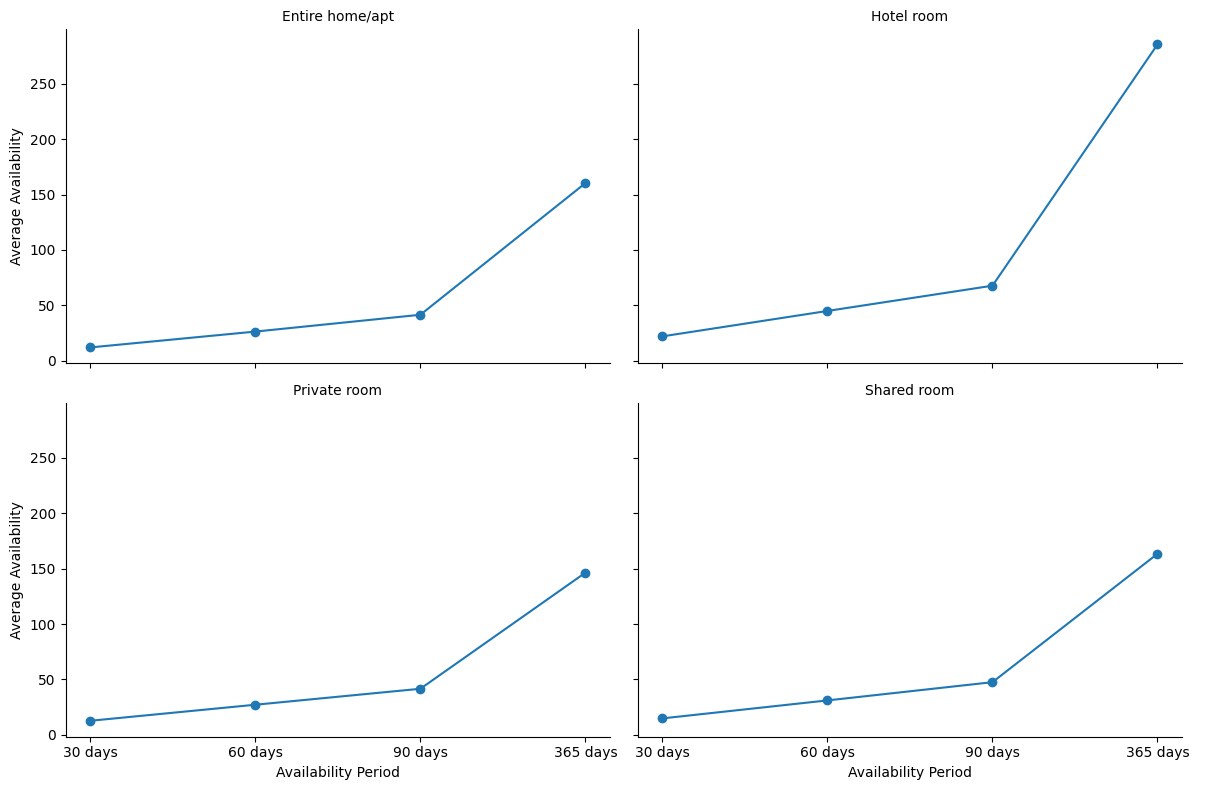

In [ ]:
# Convert the wide format data to long format for easier plotting with seaborn
long_df = pd.melt(availability_by_room_type, id_vars=['room_type'], value_vars=['availability_30', 'availability_60', 'availability_90', 'availability_365'],
                  var_name='Availability Period', value_name='Average Availability')

# Adjust the Availability Period values for clarity
long_df['Availability Period'] = long_df['Availability Period'].map({
    'availability_30': '30 days',
    'availability_60': '60 days',
    'availability_90': '90 days',
    'availability_365': '365 days'
})


# Create a FacetGrid of line charts, one for each room type
g = sns.FacetGrid(long_df, col='room_type', col_wrap=2, height=4, aspect=1.5)
g = g.map(plt.plot, 'Availability Period', 'Average Availability', marker='o')
g = g.set_titles("{col_name}")
g = g.set_axis_labels("Availability Period", "Average Availability")
g = g.add_legend()

plt.show()